# Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


![example](https://raw.githubusercontent.com/learn-co-curriculum/dsc-project-template/template-mvp/images/director_shot.jpeg)

## Overview

This project analyzes data from the biggest movie related websites to help Microsoft understand where current oppurtunities lie in this area..  The following websites are utilized in the following analyziz, imdb and box office mojo.  Microsoft can use this analysis to understand which genres make the most

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

When deciding what questions were to be answered, it was important to think about how movies are currently being created as well as what the consumers want to see.  With these thoughts in mind, I decided to focus on domestic gross, IMDB rating and average runtime.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding


The data which is being utlized for this project focuses on my main three questions stated above.  The data used in the analysis below came from reputable and popular movie based websites which focus on box office revenue, overall movie rating and details of said movies (i.e. runtime in mimutes).

### Import Packages and Files

In [46]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [48]:
query = fpath+"*.gz"

file_list = glob.glob(query)
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

### File Tables

In [49]:
tables = {}
for file in file_list:
    print('---'*20)
    file_name = file.replace('zippedData/', '').replace('.','_')
        
    print(file_name)
    
    if '.tsv.gz' in file:
        temp_df =pd.read_csv(file, sep="\t", encoding="latin-1")
    else:
        temp_df = pd.read_csv(file)
    display(temp_df.head(), temp_df.tail())
    
    tables[file_name] = temp_df

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


## Data Preparation

Describe and justify the process for preparing the data for analysis.

In preparing my data I began by joining two table to create my dataframe.  Before beginning to answer my first question I had to make sure to drop any duplicates which I had found.  I chose to keep the first mention of every duplicate and remove the rest.  This was the dataframe which I would continue to build on to asnwer my following two questions.

### Q1: What Genres Earn the Highest Gross (Domestic)

In [50]:
#Create variable using the box office mojo dataset
bom_movie_gross = tables['bom_movie_gross_csv_gz'].copy()
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [51]:
#Create variable using the IMDB title basics dataset
imdb_title_basics = tables['imdb_title_basics_csv_gz'].copy()
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [52]:
#Join the box office mojo and IMDB title basic datasets using 'title' and
# 'primary title'
df = pd.merge(bom_movie_gross, imdb_title_basics, left_on='title', 
    right_on='primary_title')
df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller"


In [53]:
#Remove duplicates based on three columns.
df[df.duplicated(keep=False, subset=['title','original_title','domestic_gross'])]

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
14,Robin Hood,Uni.,105300000.0,216400000,2010,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama"
15,Robin Hood,Uni.,105300000.0,216400000,2010,tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama"
16,Robin Hood,Uni.,105300000.0,216400000,2010,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller"
17,Robin Hood,Uni.,105300000.0,216400000,2010,tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN
18,Robin Hood,Uni.,105300000.0,216400000,2010,tt8558276,Robin Hood,Robin Hood,2017,60.0,"Action,Adventure,History"
...,...,...,...,...,...,...,...,...,...,...,...
3357,The Escape,IFC,14000.0,NaN,2018,tt5053302,The Escape,The Escape,2015,67.0,Drama
3358,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama
3360,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"


In [54]:
#Keep the first mention of all duplicates
df = df.drop_duplicates(keep='first', subset=['title','original_title','domestic_gross'])
df[df.duplicated(keep=False, subset=['title','original_title','domestic_gross'])]

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [55]:
df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
3359,Let Yourself Go,Men.,12200.0,NaN,2018,tt4932388,Let Yourself Go,Lasciati andare,2017,99.0,Comedy
3360,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller"


### Q2: What Genres Have the Highest Score on IMDB

In [56]:
#Create the variable imdb_title_ratings
imdb_title_ratings = tables['imdb_title_ratings_csv_gz'].copy()
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [57]:
#Merge df with imdb title ratings on 'tconst'
df2 = pd.merge(df, imdb_title_ratings, on='tconst')
df2

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,Let Yourself Go,Men.,12200.0,NaN,2018,tt4932388,Let Yourself Go,Lasciati andare,2017,99.0,Comedy,6.1,749
2684,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
2685,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
2686,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


### Q3: What Run Time Has the Highest Rating

In [58]:
#Create the variable df3
df3 = df2
df3

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,Let Yourself Go,Men.,12200.0,NaN,2018,tt4932388,Let Yourself Go,Lasciati andare,2017,99.0,Comedy,6.1,749
2684,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
2685,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
2686,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


### Possible Side Idea

In [59]:
tn_movie_budget = tables['tn_movie_budgets_csv_gz'].copy()
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [60]:
side_idea = pd.merge(imdb_title_basics, tn_movie_budget, left_on='primary_title', 
    right_on='movie')
side_idea

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [61]:
side_idea[side_idea.duplicated(keep=False, subset=['primary_title','original_title','domestic_gross'])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
6,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3771,tt9654814,Serendipity,Serendipity,2019,74.0,Documentary,53,"Oct 5, 2001",Serendipity,"$28,000,000","$50,255,310","$77,477,297"
3780,tt8614260,Without Limits,Without Limits,2018,NaN,Sport,16,"Sep 11, 1998",Without Limits,"$25,000,000","$780,326","$780,326"
3781,tt8619504,Without Limits,Without Limits,2018,NaN,NaN,16,"Sep 11, 1998",Without Limits,"$25,000,000","$780,326","$780,326"
3788,tt8662424,Never Again,Never Again,2017,106.0,Drama,47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793"


In [62]:
side_idea = side_idea.drop_duplicates(keep='first', subset=['primary_title','original_title','domestic_gross'])
side_idea[side_idea.duplicated(keep=False, subset=['primary_title','original_title','domestic_gross'])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [63]:
side_idea

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
10,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


## Data Analysis
I analyzed the dataframes which I prepared above by separating the genre column and finding the mean for domestic gross per genre as well as the mean for average rating per genre through IMDB.  I visulaized my findings for both of these questions using bar plots.

Utilizing the information which I already had, I created a histogram to show the most popular runtime for the movies in the dataframe.

### Q1: What Genres Earn the Highest Gross (Domestic)

In [64]:
#Split the genres column to be able to use grouby
df['new_genres']=df['genres'].str.split(',')
df

<ipython-input-64-729f7a4fb2da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_genres']=df['genres'].str.split(',')


,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy","[Adventure, Drama, Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,Let Yourself Go,Men.,12200.0,NaN,2018,tt4932388,Let Yourself Go,Lasciati andare,2017,99.0,Comedy,[Comedy]
3360,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance","[Drama, Music, Romance]"
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller","[Crime, Drama, Thriller]"
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller","[Action, Drama, Thriller]"


In [65]:
df_genres = df.explode('new_genres')
df_genres

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Adventure
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Animation
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",Thriller
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",Action
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",Drama
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",Thriller


In [66]:
#Found the mean of domestic gross by genre and sorted them in ascending order
genre_mean = df_genres.groupby('new_genres').mean()['domestic_gross']
genre_mean = genre_mean.sort_values(ascending = False)
genre_mean.index

Index(['Sci-Fi', 'Adventure', 'Animation', 'Action', 'Fantasy', 'Family',
       'Comedy', 'Thriller', 'Sport', 'Western', 'Horror', 'Mystery', 'Crime',
       'Musical', 'Biography', 'Music', 'Drama', 'Romance', 'History',
       'Documentary', 'War', 'News'],
      dtype='object', name='new_genres')

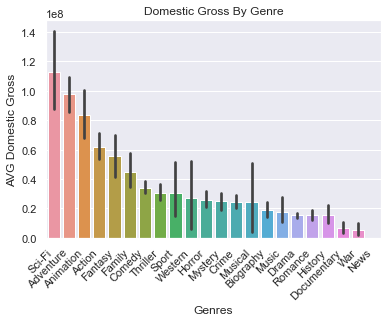

In [67]:
#Utilizing seasborn, plotted a bar plot
ax = sns.barplot(data=df_genres, x = 'new_genres', y = 'domestic_gross',
                order = genre_mean.index)
ax.set_title('Domestic Gross By Genre')
ax.set(xlabel="Genres", ylabel = "AVG Domestic Gross")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

### Q2: What Genres Have the Highest Score on IMDB

In [68]:
#Split the genres column
df2['new_genres']=df2['genres'].str.split(',')
df2

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,"[Adventure, Animation, Comedy]"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,"[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,"[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,"[Adventure, Drama, Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,Let Yourself Go,Men.,12200.0,NaN,2018,tt4932388,Let Yourself Go,Lasciati andare,2017,99.0,Comedy,6.1,749,[Comedy]
2684,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823,"[Drama, Music, Romance]"
2685,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016,"[Crime, Drama, Thriller]"
2686,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270,"[Action, Drama, Thriller]"


In [69]:
df2_genres = df2.explode('new_genres')
df2_genres

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Animation
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016,Thriller
2686,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270,Action
2686,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270,Drama
2686,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270,Thriller


In [70]:
#Determine the average rating per genre
genre_ratings_mean = df2_genres.groupby('new_genres').mean()['averagerating']
genre_ratings_mean = genre_ratings_mean.sort_values(ascending = False)
genre_ratings_mean.index

Index(['Documentary', 'Biography', 'History', 'Sport', 'War', 'Music',
       'Western', 'News', 'Animation', 'Drama', 'Crime', 'Sci-Fi', 'Adventure',
       'Romance', 'Action', 'Mystery', 'Fantasy', 'Comedy', 'Thriller',
       'Musical', 'Family', 'Horror'],
      dtype='object', name='new_genres')

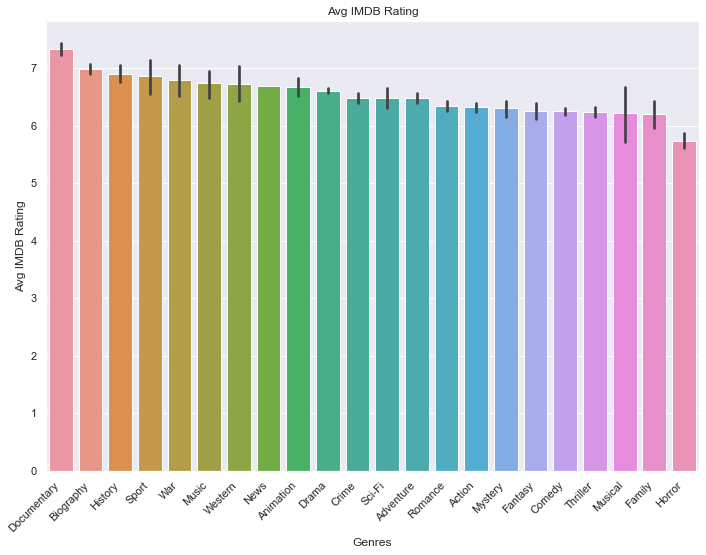

In [71]:
#Graph the average IMDB rating by genre using seaborn
ax = sns.barplot(data=df2_genres, x = 'new_genres', y = 'averagerating',
                order = genre_ratings_mean.index)
ax.set_title('Avg IMDB Rating')
ax.set(xlabel="Genres", ylabel = "Avg IMDB Rating")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

### Q3: What Run Time Has the Highest Rating

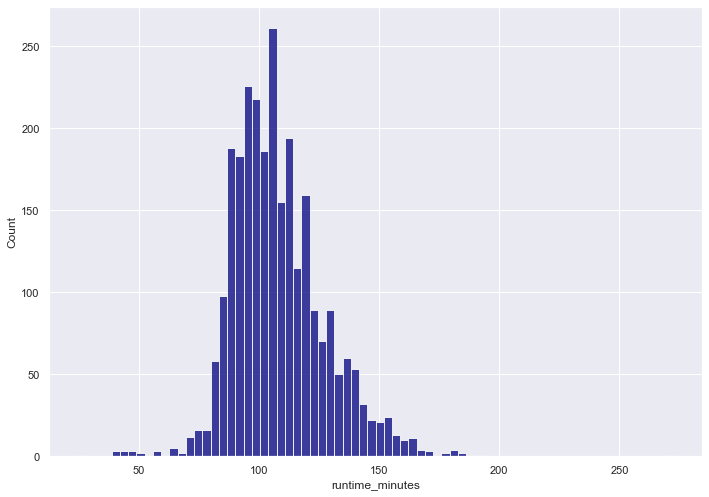

In [72]:
#Find out the most common runtime per film using a histogram
ax = sns.histplot(data=df3, x = 'runtime_minutes', color = 'navy')

### Possible Side Idea

In [73]:
side_idea['new_genres']=side_idea['genres'].str.split(',')
side_idea

<ipython-input-73-10511e618d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  side_idea['new_genres']=side_idea['genres'].str.split(',')


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,new_genres
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706","[Action, Animation, Comedy]"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227","[Action, Adventure, Fantasy]"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",NaN
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302","[Adventure, Drama, Romance]"
10,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183","[Adventure, Comedy, Drama]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255","[Documentary, Sport]"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907",[Crime]
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226","[Action, Drama, Romance]"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094",[Crime]


In [74]:
df3_genres = side_idea.explode('new_genres')
df3_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,new_genres
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Action
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Animation
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Comedy
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227",Action
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226",Action
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226",Drama
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226",Romance
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094",Crime


In [75]:
genre_mean_side = df3_genres.groupby('new_genres').mean()['domestic_gross']
genre_mean_side = genre_mean_side.sort_values(ascending = False)
genre_mean_side.index

KeyError: 'domestic_gross'

## Evaluation

The work which I have provided above will help with the business problem given.  It will guide in not only the genres which should be prioritized but also one of the most ciritical aspects of a film, the runtime.

## Conclusions

After analyzing the data from the 